# Breast Cancer Classification Model 

# INTRODUCTION¶


Using the Breast Cancer Wisconsin Diagnostic Dataset, we assess the efficacy of several classification algorithms for breast cancer prediction in this article. The best model for classifying breast cancer will be determined by comparing the accuracy and other assessment criteria of several classifiers.

# DATASET

Breast mass photos and the related diagnosis (Malignant or Benign) are used to construct features in the Breast Cancer Wisconsin Diagnostic Dataset. 80% of the data were utilised for training and 20% for testing after dividing the dataset into training and testing sets.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the Dataset

In [2]:
da=pd.read_csv("brca.csv")

In [3]:
da

,Unnamed: 0,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,1,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B
1,2,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B
2,3,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B
3,4,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B
4,5,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,565,20.920,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.147400,0.2149,...,29.41,179.10,1819.0,0.14070,0.41860,0.65990,0.25420,0.2929,0.09873,M
565,566,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.138900,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115,M
566,567,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.097910,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637,M
567,568,16.600,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.053020,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820,M


# Data Preprocessing

In [4]:
# Check for missing values
da.isnull().sum()

Unnamed: 0             0
x.radius_mean          0
x.texture_mean         0
x.perimeter_mean       0
x.area_mean            0
x.smoothness_mean      0
x.compactness_mean     0
x.concavity_mean       0
x.concave_pts_mean     0
x.symmetry_mean        0
x.fractal_dim_mean     0
x.radius_se            0
x.texture_se           0
x.perimeter_se         0
x.area_se              0
x.smoothness_se        0
x.compactness_se       0
x.concavity_se         0
x.concave_pts_se       0
x.symmetry_se          0
x.fractal_dim_se       0
x.radius_worst         0
x.texture_worst        0
x.perimeter_worst      0
x.area_worst           0
x.smoothness_worst     0
x.compactness_worst    0
x.concavity_worst      0
x.concave_pts_worst    0
x.symmetry_worst       0
x.fractal_dim_worst    0
y                      0
dtype: int64

In [6]:
da = da.dropna()
 

In [7]:
X = da.drop('y', axis=1)
y = da['y']

In [9]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Splitting the Data

In [10]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Feature Scaling

In [20]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Selection and Evaluation


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
 

In [21]:
classifiers = [
    LogisticRegression(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    SVC(),
    KNeighborsClassifier()]

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [24]:
# List to store model performance
model_names = []
performance = []

# Train and evaluate each classifier
for classifier in classifiers:
    # Train the model
    classifier.fit(X_train_scaled, y_train)
    
    # Make predictions on the testing set
    predictions = classifier.predict(X_test_scaled)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictions)
    
    # Store model performance
    model_names.append(classifier.__class__.__name__)
    performance.append([accuracy, precision, recall, f1, roc_auc])

C:\Users\Harshith\anaconda03\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Model Performance Comparison

In [27]:
performance_df = pd.DataFrame(performance, columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC'], index=model_names)

In [36]:
from tabulate import tabulate

print(f'\nResult\n')
print(tabulate(performance_df, headers='keys', tablefmt='psql'))
print()



Result

+----------------------------+------------+-------------+----------+------------+-----------+
|                            |   Accuracy |   Precision |   Recall |   F1-Score |   ROC AUC |
|----------------------------+------------+-------------+----------+------------+-----------|
| LogisticRegression         |   1        |    1        | 1        |   1        |  1        |
| RandomForestClassifier     |   1        |    1        | 1        |   1        |  1        |
| GradientBoostingClassifier |   0.991228 |    0.979167 | 1        |   0.989474 |  0.992537 |
| SVC                        |   1        |    1        | 1        |   1        |  1        |
| KNeighborsClassifier       |   0.991228 |    1        | 0.978723 |   0.989247 |  0.989362 |
| KNeighborsClassifier       |   0.991228 |    1        | 0.978723 |   0.989247 |  0.989362 |
+----------------------------+------------+-------------+----------+------------+-----------+



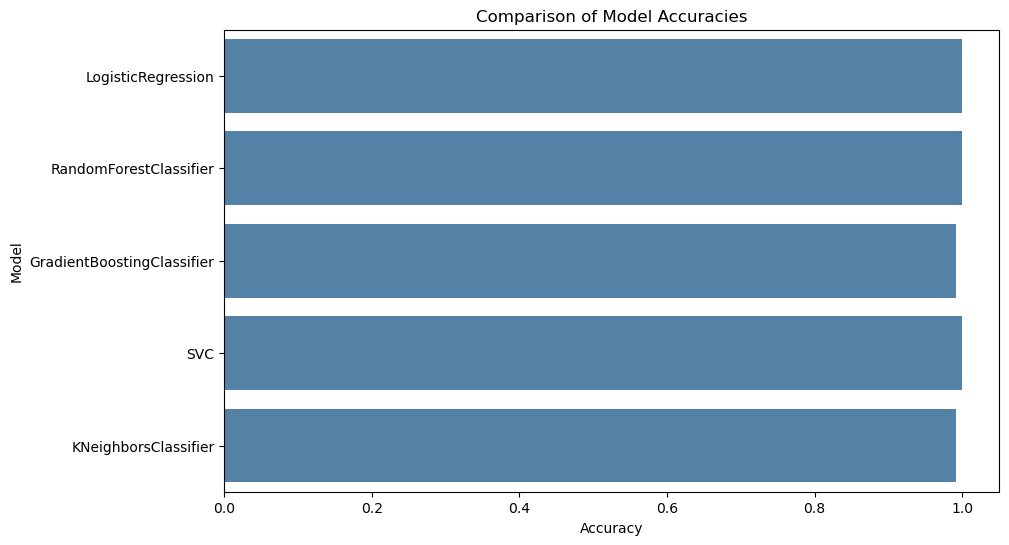

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(x=performance_df['Accuracy'], y=performance_df.index, color='steelblue')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Comparison of Model Accuracies')
plt.show()